In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
import datetime
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv('./data/cases_train_processed.csv')


In [ ]:
test_data=pd.read_csv('./data/cases_test_processed.csv')

In [ ]:
data.outcome.unique()

array(['recovered', 'hospitalized', 'nonhospitalized', 'deceased'],
      dtype=object)

In [ ]:
data['age']=data['age'].fillna(np.mean(data['age']))
data['sex']=data['sex'].fillna(999)
data['date_confirmation']=data['date_confirmation'].fillna(data.date_confirmation.mode()[0])
data['source']=data['source'].fillna(data.source.mode()[0])

In [ ]:
test_data['age']=test_data['age'].fillna(np.mean(test_data['age']))
test_data['sex']=test_data['sex'].fillna(999)
test_data['date_confirmation']=test_data['date_confirmation'].fillna(test_data.date_confirmation.mode()[0])
test_data['source']=test_data['source'].fillna(test_data.source.mode()[0])

In [ ]:
data.columns

Index(['age', 'sex', 'province', 'country', 'latitude', 'longitude',
       'date_confirmation', 'additional_information', 'source', 'outcome',
       'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Combined_Key', 'Incidence_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [ ]:
test_data.columns

Index(['age', 'sex', 'province', 'country', 'latitude', 'longitude',
       'date_confirmation', 'source', 'outcome', 'area_last_update',
       'area_confirmed_cases', 'area_deaths_cases', 'area_recovered_case',
       'area_active_cases', 'location_info', 'area_incidence_rate',
       'area_case_fatality_ratio'],
      dtype='object')

In [ ]:
del data['additional_information']
del data['Lat']
del data['Long_']

test_data.columns=data.columns

In [ ]:
for col in data.columns:
    if data[col].dtype=='object':
        data[col]=data[col].fillna(data[col].mode()[0])
    else:
        data[col]=data[col].fillna(np.mean(data[col]))
        
for col in test_data.columns:
    if test_data[col].dtype=='object':
        test_data[col]=test_data[col].fillna(test_data[col].mode()[0])
    else:
        test_data[col]=test_data[col].fillna(np.mean(test_data[col]))

In [ ]:
test_data.isna().sum()

age                        0
sex                        0
province                   0
country                    0
latitude                   0
longitude                  0
date_confirmation          0
source                     0
outcome                46500
Last_Update                0
Confirmed                  0
Deaths                     0
Recovered                  0
Active                     0
Combined_Key               0
Incidence_Rate             0
Case_Fatality_Ratio        0
dtype: int64

In [ ]:
data.nunique()

age                     156
sex                       3
province               1106
country                  66
latitude               7110
longitude              7107
date_confirmation       154
source                 6841
outcome                   4
Last_Update               1
Confirmed               364
Deaths                  302
Recovered               264
Active                  332
Combined_Key            370
Incidence_Rate          371
Case_Fatality_Ratio     360
dtype: int64

In [ ]:
data.outcome.unique()

array(['recovered', 'hospitalized', 'nonhospitalized', 'deceased'],
      dtype=object)

In [ ]:
test_data.head()

,age,sex,province,country,latitude,longitude,date_confirmation,source,outcome,Last_Update,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case_Fatality_Ratio
0,54,male,Rajasthan,India,24.587000,73.69848,11.05.2020,https://t.me/indiacovid/4565,NaN,2020-09-20 04:22:56,111290.0,1308.0,92265.0,17717.0,"Rajasthan, India",137.339636,1.175308
1,25,male,Bayern,Germany,49.993767,9.66288,09.04.2020,Unknown,NaN,2020-09-20 04:22:56,64465.0,2648.0,56398.0,5419.0,"Bayern, Germany",492.975265,4.107655
2,70,male,Maharashtra,India,19.200000,72.96667,23.05.2020,https://phdmah.maps.arcgis.com/apps/opsdashboa...,NaN,2020-09-20 04:22:56,1167496.0,31791.0,834432.0,301273.0,"Maharashtra, India",948.072083,2.723007
3,55,male,Madhya Pradesh,India,23.180870,75.78816,22.05.2020,https://twitter.com/JansamparkMP/status/126384...,NaN,2020-09-20 04:22:56,100458.0,1901.0,76952.0,21605.0,"Madhya Pradesh, India",117.688868,1.892333
4,56,female,Lima,Peru,-12.003950,-77.00695,19.04.2020,Unknown,NaN,2020-09-20 04:22:56,349167.0,14009.0,0.0,335158.0,"Lima, Peru",3285.195465,4.012120


In [ ]:
def targetmap(x):
    if x=='deceased':
        return 0
    elif x=='hospitalized':
        return 1
    elif x=='nonhospitalized':
        return 2
    else:
        return 3
        

for col in ['Last_Update']:
    data[col+'month']=data[col].apply(lambda x:int(str(x).split()[0].split('/')[1]))
    data[col+'day']=data[col].apply(lambda x:int(str(x).split()[0].split('/')[2]))
    del data[col]
    
for col in ['sex','province','country','source','Combined_Key']:
    codes, uniques = pd.factorize(data[col])
    data[col]=codes
    
data['outcome']=data['outcome'].map(targetmap)

for col in ['Last_Update']:
    test_data[col+'month']=test_data[col].apply(lambda x:int(str(x).split()[0].split('-')[1]))
    test_data[col+'day']=test_data[col].apply(lambda x:int(str(x).split()[0].split('-')[2]))
    del test_data[col]

del data['date_confirmation']
del test_data['date_confirmation']
    

    
for col in ['sex','province','country','source','Combined_Key']:
    codes, uniques = pd.factorize(test_data[col])
    test_data[col]=codes

2.split data

In [ ]:
cols=[col for col in data.columns if col!='outcome']

In [ ]:
y=data['outcome']
X=data[cols]

test_X=test_data[cols]
test_y=test_data['outcome']

Text(0.5, 1.0, 'features correlation')

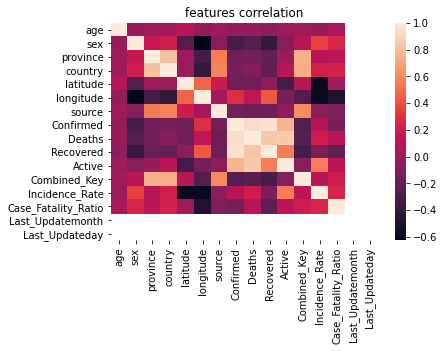

In [ ]:
import seaborn as sns
sns.heatmap(X.corr())
plt.title('features correlation')

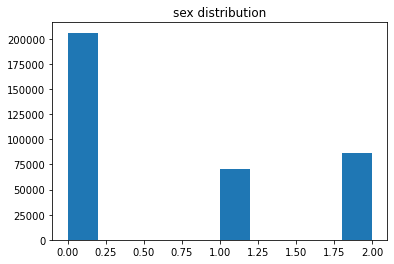

In [ ]:
plt.hist(data['sex'])
plt.title('sex distribution')
plt.show()

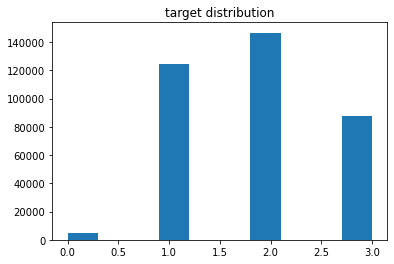

In [ ]:
plt.hist(y)
plt.title('target distribution')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sca=StandardScaler()
X=sca.fit_transform(X)
test_X=sca.fit_transform(test_X)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.2, random_state=42)

3.build model

In [ ]:
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn.neural_network import MLPClassifier
import math
import pickle
from sklearn.metrics import classification_report

In [ ]:
def model_lgb_train(trainX,trainy,params):
    model=lgb.LGBMClassifier(**params)
    model.fit(trainX,trainy,early_stopping_rounds=30,eval_set=[(X_train, y_train),(X_val, y_val)],verbose=0)
    return model

def model_lgb_val(valX,model):
    pred=model.predict(valX)
    return pred

In [ ]:
def model_svr_train(trainX,trainy,params):
    model=SVC(**params)
    model.fit(trainX,trainy)
    return model

def model_svr_val(valX,model):
    pred=model.predict(valX)
    return pred

In [ ]:
def model_mlp_train(trainX,trainy,params):
    model=MLPClassifier(**params)
    model.fit(trainX,trainy)
    return model

def model_mlp_val(valX,model):
    pred=model.predict(valX)
    return pred

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 

model=lgb.LGBMClassifier()
param_grid = {
    'max_depth': [8],#[4,6,8],
    'num_leaves': [40],#[20,30,40],
    'learning_rate':[0.1],#[0.01,0.05,0.1,0.2],
    'n_estimators':[300]#[100,200,300]
}

kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=7)
 
grid_search = GridSearchCV(model,param_grid,scoring = 'f1_macro',n_jobs = -1,cv = kflod)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
lgbparams = grid_result.cv_results_['params']


Best: 0.667610 using {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300, 'num_leaves': 40}


In [ ]:
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=7, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'n_estimators': [300], 'num_leaves': [40]},
             scoring='f1_macro')

In [ ]:
pred=grid_result.predict(X)
print(classification_report(pred,y,target_names=['recovered', 'hospitalized', 'nonhospitalized', 'deceased']))

                 precision    recall  f1-score   support

      recovered       0.12      0.90      0.22       604
   hospitalized       0.85      0.81      0.83    131579
nonhospitalized       0.99      0.99      0.99    147533
       deceased       0.72      0.75      0.73     83814

       accuracy                           0.87    363530
      macro avg       0.67      0.86      0.69    363530
   weighted avg       0.88      0.87      0.87    363530



In [ ]:
test_pred=grid_result.predict(test_X)

In [ ]:
def targetmap(x):
    if x==0:
        return 'deceased'
    elif x==1:
        return 'hospitalized'
    elif x==2:
        return 'nonhospitalized'
    else:
        return 'recovered'

test_pred1=pd.DataFrame(test_pred)
test_pred1[0]=test_pred1[0].map(targetmap)

with open('./results/predictions.txt','w') as f:
    f.write(list(test_pred1[0])[0])
    for i in list(test_pred1[0])[1:]:
        f.write('\n'+i)

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 

model=SVC()
param_grid = {
    'degree':[2,3,4]
}


kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=7)
 
grid_search = GridSearchCV(model,param_grid,scoring = 'f1_macro',n_jobs = -1,cv = kflod)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
svcparams = grid_result.cv_results_['params']


KeyboardInterrupt: 

In [ ]:
pred=grid_result.predict(X)
print(classification_report(pred,y,target_names=['recovered', 'hospitalized', 'nonhospitalized', 'deceased']))

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV 

model=MLPClassifier()
param_grid = {
    'max_iter': [100,150,200],
    'alpha':[0.5,1,2]
}

kflod = StratifiedKFold(n_splits=10, shuffle = True,random_state=7)
 
grid_search = GridSearchCV(model,param_grid,scoring = 'f1_macro',n_jobs = -1,cv = kflod)
grid_result = grid_search.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))
means = grid_result.cv_results_['mean_test_score']
mlpparams = grid_result.cv_results_['params']


In [ ]:
pred=grid_result.predict(X)
print(classification_report(pred,y,target_names=['recovered', 'hospitalized', 'nonhospitalized', 'deceased']))

In [ ]:
params_lgb_best={ 'boosting_type':'gbdt','objective':'multiclass',
            'learning_rate':0.1, 'n_estimators':500, 'max_depth':5,
            'metric':'multi_error', 'bagging_fraction':0.8, 'feature_fraction':0.8, 'reg_lambda':0.9,'verbose':1000,'silent':False
}

params_svr_best={
    'kernel' :'rbf','degree' : 3,'gamma' :'auto','tol' : 0.001
}

params_mlp_best={
    'hidden_layer_sizes':(100,50), 'activation':'relu','solver':'adam',
    'alpha':0.02,'max_iter':200
}

In [ ]:
model_lgb=model_lgb_train(X_train, y_train,params_lgb)
output = open('./models/lgb_classifier.pkl', 'wb')
pickle.dump(model_lgb, output)
output.close()
model_lgb=pickle.load(open('./models/lgb_classifier.pkl', 'rb'))
pred_lgb_val=model_lgb_val(X_val,model_lgb)
pred_lgb_train=model_lgb_val(X_train,model_lgb)
print('the train acc of lgb is '+str(accuracy_score(pred_lgb_train,y_train)))
print('the train f1 of lgb is '+str(f1_score(pred_lgb_train,y_train)))

print('the val acc of lgb is '+str(accuracy_score(pred_lgb_val,y_val)))
print('the  val f1 of lgb is '+str(f1_score(pred_lgb_val,y_val)))



In [ ]:
model_svr=model_svr_train(X_train, y_train,params_svr)
output = open('./models/svc_classifier.pkl', 'wb')
pickle.dump(model_svr, output)
output.close()
model_svr=pickle.load(open('./models/svc_classifier.pkl', 'rb'))
pred_svr_val=model_svr_val(X_val,model_svr)
pred_svr_train=model_svr_val(X_train,model_svr)

print('the train acc of svm is '+str(accuracy_score(pred_svr_train,y_train)))
print('the train f1 of svm is '+str(f1_score(pred_svr_train,y_train)))

print('the val acc of svm is '+str(accuracy_score(pred_svr_val,y_val)))
print('the  val f1 of svm is '+str(f1_score(pred_svr_val,y_val)))

In [ ]:
model_mlp=model_mlp_train(X_train, y_train,params_mlp)
output = open('./models/mlp_classifier.pkl', 'wb')
pickle.dump(model_mlp, output)
output.close()
model_mlp=pickle.load(open('./models/mlp_classifier.pkl', 'rb'))
pred_mlp_val=model_mlp_val(X_val,model_mlp)
pred_mlp_train=model_mlp_val(X_train,model_mlp)

print('the train acc of mlp is '+str(accuracy_score(pred_mlp_train,y_train)))
print('the train f1 of mlp is '+str(f1_score(pred_mlp_train,y_train)))

print('the val acc of mlp is '+str(accuracy_score(pred_mlp_val,y_val)))
print('the  val f1 of mlp is '+str(f1_score(pred_mlp_val,y_val)))

In [ ]:
fig = plt.figure(figsize=(8,6))

sns.barplot(['train_lgb','val_lgb','train_svm','val_svm','train_mlp','val_mlp']
            ,[accuracy_score(pred_lgb_train,y_train),accuracy_score(pred_lgb_val,y_val),
              accuracy_score(pred_svr_train,y_train),accuracy_score(pred_svr_val,y_val),
              accuracy_score(pred_mlp_train,y_train),accuracy_score(pred_mlp_val,y_val),
             ])

plt.title('the acc of three models')

plt.savefig('./plots/accuracy.png')

In [ ]:
fig = plt.figure(figsize=(8,6))

sns.barplot(['train_lgb','val_lgb','train_svm','val_svm','train_mlp','val_mlp']
            ,[f1_score(pred_lgb_train,y_train),f1_score(pred_lgb_val,y_val),
              f1_score(pred_svr_train,y_train),f1_score(pred_svr_val,y_val),
              f1_score(pred_mlp_train,y_train),f1_score(pred_mlp_val,y_val),
             ])

plt.title('the f1_score of three models')

plt.savefig('./plots/f1_score.png')

In [ ]:
params_lgb1={ 'boosting_type':'gbdt','objective':'binary',
            'learning_rate':0.3, 'n_estimators':500, 'max_depth':5,
            'metric':'binary_logloss', 'bagging_fraction':0.8, 'feature_fraction':0.8, 'reg_lambda':0.9,'verbose':0,
}

params_svr1={
    'kernel' :'linear','degree' : 5,'gamma' :'auto','tol' : 0.001
}

params_mlp1={
    'hidden_layer_sizes':(100,50), 'activation':'relu','solver':'adam',
    'alpha':0.1,'max_iter':400
}

In [ ]:
model_lgb=model_lgb_train(X_train, y_train,params_lgb1)
pred_lgb_val=model_lgb_val(X_val,model_lgb)
pred_lgb_train=model_lgb_val(X_train,model_lgb)
print('the train acc of lgb1 is '+str(accuracy_score(pred_lgb_train,y_train)))
print('the train f1 of lgb1 is '+str(f1_score(pred_lgb_train,y_train)))

print('the val acc of lgb1 is '+str(accuracy_score(pred_lgb_val,y_val)))
print('the  val f1 of lgb1 is '+str(f1_score(pred_lgb_val,y_val)))

In [ ]:
model_svr=model_svr_train(X_train, y_train,params_svr1)
pred_svr_val=model_svr_val(X_val,model_svr)
pred_svr_train=model_svr_val(X_train,model_svr)

print('the train acc of svm1 is '+str(accuracy_score(pred_svr_train,y_train)))
print('the train f1 of svm1 is '+str(f1_score(pred_svr_train,y_train)))

print('the val acc of svm1 is '+str(accuracy_score(pred_svr_val,y_val)))
print('the  val f1 of svm1 is '+str(f1_score(pred_svr_val,y_val)))

In [ ]:
model_mlp=model_mlp_train(X_train, y_train,params_mlp1)
pred_mlp_val=model_mlp_val(X_val,model_mlp)
pred_mlp_train=model_mlp_val(X_train,model_mlp)

print('the train acc of mlp1 is '+str(accuracy_score(pred_mlp_train,y_train)))
print('the train f1 of mlp1 is '+str(f1_score(pred_mlp_train,y_train)))

print('the val acc of mlp1 is '+str(accuracy_score(pred_mlp_val,y_val)))
print('the  val f1 of mlp1 is '+str(f1_score(pred_mlp_val,y_val)))